In [965]:
import numpy as np
import random 
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import sklearn as sl
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import csv
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [966]:
def replace_a_column (array, column_number, transformed_column):
    for i in range(len(array)):
        array[i][column_number]=transformed_column[i][0]
    return array

In [967]:
data=np.genfromtxt("processed.cleveland.data",delimiter=",")
num_row=np.shape(data)[0]
row_contain_nan=[]
for i in range(num_row):
    if (np.any(np.isnan(data[i]))):
        row_contain_nan.append(i)
        
#print (row_contain_nan)


data=np.delete(data,row_contain_nan,axis=0)
#print (type(data[0][12]))
#print (data[:,3])

for i in [3,4,7,9]:
    
    scaler = StandardScaler()
    #print("column",i, data[:,i])
    temp_column=data[:,i].reshape(-1,1)
    scaler.fit(temp_column)
    data=replace_a_column(data,i,scaler.transform(temp_column))
    #print("transformed column",i,data[:,i])
train_data_raw=data[0:int(num_row*0.7),:]
test_data_raw=data[(int(num_row*0.3)+1):(num_row-1),:]
train_data=np.delete(train_data_raw, -1, axis=1)
test_data=np.delete(test_data_raw, -1, axis=1)
train_lable=train_data_raw[:,-1]
for i in range(len(train_lable)): 
    if train_lable[i]>0:
        train_lable[i]=1
        
#print(train_lable)
test_lable=test_data_raw[:,-1]
for i in range(len(test_lable)): 
    if test_lable[i]>0:
        test_lable[i]=1
#print (test_lable)


In [968]:
data_breast_cancer=np.genfromtxt("breast-cancer-wisconsin.data",delimiter=",")
num_row=np.shape(data_breast_cancer)[0]
for i in range(num_row):
    if (np.any(np.isnan(data_breast_cancer[i]))):
        row_contain_nan.append(i)
data_breast_cancer=np.delete(data_breast_cancer,row_contain_nan,axis=0)        
#print (row_contain_nan)
data_breast_cancer=np.delete(data_breast_cancer,0, axis=1)


X_breast_cancer=np.delete(data_breast_cancer, -1, axis=1)
#print(X_breast_cancer)
y_breast_cancer=data_breast_cancer[:,-1]
for i in range (0, len(y_breast_cancer)):
    y_breast_cancer[i]=y_breast_cancer[i]/2-1
#print(y_breast_cancer)
breast_cancer_train, breast_cancer_test, breast_cancer_lable_train, breast_cancer_lable_test = train_test_split(X_breast_cancer, y_breast_cancer, test_size=0.3, random_state=42)
#print ()

In [970]:
def decision_tree_gridSearch (train_data,train_lable):
    clf =tree.DecisionTreeClassifier()
    
    param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,10),'min_samples_split': range(2,10),  'min_samples_leaf': range(1,5),}
    
    # define evaluation
    #cv = RepeatedStratifiedKFold(n_splits=60, n_repeats=3, random_state=1)
    # define the search
    grid = GridSearchCV(clf,param_grid,refit=True,verbose=2)
    grid.fit(train_data, train_lable)
    
    
    return grid.best_params_

In [971]:
#print(decision_tree_gridSearch(breast_cancer_train, breast_cancer_lable_train))

In [972]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    if axes is None:
        _, axes = plt.subplots(2, figsize=(20, 10))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, test_times = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    test_times_mean= np.mean(test_times, axis=1)
    test_times_std = np.std(test_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    
    
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1, color="r")
    axes[1].fill_between(train_sizes, test_times_mean - test_times_std,
                         test_times_mean + test_times_std, alpha=0.1, color="g")
    axes[1].plot(train_sizes, fit_times_mean, 'o-', color="r", label="Training time")
    axes[1].plot(train_sizes, test_times_mean, 'o-', color="g", label="Testing time")
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("times")
    axes[1].set_title("Scalability of the model")
    axes[1].legend(loc="best")

    # Plot fit_time vs score
    #axes[2].grid()
    #axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    #axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1)
    #axes[2].set_xlabel("fit_times")
    #axes[2].set_ylabel("Score")
    #axes[2].set_title("Performance of the model")

    return plt

In [973]:
def decision_tree_learning_curve(title,X,y):
    fig, axes = plt.subplots(2, 2, figsize=(10, 15))


    parameter=decision_tree_gridSearch (X,y)
    # Cross validation with 100 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

    estimator =tree.DecisionTreeClassifier(criterion=parameter["criterion"], max_depth=parameter["max_depth"], min_samples_leaf=parameter["min_samples_leaf"], min_samples_split=parameter["min_samples_split"])
    plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)


    plt.show()
    plt.close()

In [974]:

#decision_tree_learning_curve("breast Cancer Learning Curve",breast_cancer_train, breast_cancer_lable_train)

In [975]:
#decision_tree_learning_curve("Heart Disease Learning Curve",train_data, train_lable)

In [976]:
 def validationCurve(estimator, title, X, y,parameter, param_range):
     
    train_scores, test_scores = validation_curve (estimator, X, y, param_name=parameter, param_range=param_range,scoring="accuracy", n_jobs=1)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(parameter)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score", color="red", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.2,color="red", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="green", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2,color="green", lw=lw)
    plt.legend(loc="best")
    plt.show()

In [977]:
def decision_tree_validation_curve(title,X,y):
    
    parameter=decision_tree_gridSearch (X,y)
    

    estimator =tree.DecisionTreeClassifier(criterion=parameter["criterion"], min_samples_leaf=parameter["min_samples_leaf"], min_samples_split=parameter["min_samples_split"])
    validationCurve(estimator, title, X, y, "max_depth", range(1,10))


    

In [978]:
#decision_tree_validation_curve("Breast Cancer Validation Curve",breast_cancer_train, breast_cancer_lable_train)

In [979]:
#decision_tree_validation_curve("Heart Disease Validation Curve",train_data, train_lable)

In [981]:
#decisionTree_criterion_plot()

In [982]:
def decisionTree_maxDepth_plot(title,train_data, train_lable, test_data, test_lable):
    Acc=[]
    FP=[]
    FN=[]
    parameter=decision_tree_gridSearch (train_data, train_lable)
    for each in range(1,10):
        clf =tree.DecisionTreeClassifier(criterion=parameter["criterion"], max_depth=each, min_samples_leaf=parameter["min_samples_leaf"], min_samples_split=parameter["min_samples_split"])
        clf = clf.fit(train_data, train_lable)
        score=clf.score(test_data, test_lable)
        Acc.append(score)
        
    raw_data = {'Accuracy': Acc}

    df1 = pd.DataFrame(raw_data,
                  index=pd.Index(range(1,10), name='Parameters Name'),
                  columns=pd.Index(['Accuracy'], name='Parameters'))
    print(df1)
    plt.plot(df1.index,"Accuracy",label="Accuracy", data=df1, marker='o')
    plt.ylim (0,1)
    plt.legend()
    plt.xlabel("Max Depth")
    plt.ylabel("Score")
    plt.title (title)
    plt.show()
    plt.close()

In [983]:
#decisionTree_maxDepth_plot("Hear Disease Test Plot of Max Depth of Decision Tree",train_data, train_lable, test_data, test_lable)
#decisionTree_maxDepth_plot("Breast Cancer Test Plot of Max Depth of Decision Tree",breast_cancer_train, breast_cancer_lable_train, breast_cancer_test, breast_cancer_lable_test)

In [985]:
#decisionTree_minSamplesSplit_plot()

In [989]:
def random_forrest_gridSearch (train_data,train_lable):
    clf =RandomForestClassifier()
    
    
    
    param_grid = {'n_estimators': [10, 50, 100, 200, 400],
               'max_features':  ['auto', 'sqrt'], 'max_depth': [1,5,10, 20],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
    
    # define evaluation
    #cv = RepeatedStratifiedKFold(n_splits=60, n_repeats=3, random_state=1)
    # define the search
    grid = GridSearchCV(clf,param_grid,refit=True,verbose=2)
    grid.fit(train_data, train_lable)
    
    
    return grid.best_params_
    

In [990]:
#print (random_forrest_gridSearch (train_data,train_lable))

In [991]:
def random_forrest_learning_curve(title,X,y):
    fig, axes = plt.subplots(2, 2, figsize=(10, 15))


    parameter=random_forrest_gridSearch (X,y)
    # Cross validation with 100 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

    estimator =RandomForestClassifier(n_estimators=parameter["n_estimators"],
               max_features=parameter ['max_features'], max_depth=parameter ["max_depth"],
               min_samples_split=parameter ['min_samples_split'],
               min_samples_leaf=parameter ['min_samples_leaf'],
               bootstrap=parameter ['bootstrap'])
    plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)


    plt.show()
    plt.close()

In [992]:
#random_forrest_learning_curve ("Random Forrest Learning Curve for Heart Disease",train_data, train_lable)

In [993]:
def random_forrest_validation_curve(title,X,y):
    
    parameter=random_forrest_gridSearch (X,y)
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

    estimator =RandomForestClassifier(max_features=parameter ['max_features'], max_depth=parameter ["max_depth"],
               min_samples_split=parameter ['min_samples_split'],
               min_samples_leaf=parameter ['min_samples_leaf'],
               bootstrap=parameter ['bootstrap'])

    
    validationCurve(estimator, title, X, y, 'n_estimators', range(1,30,3))

In [994]:
#random_forrest_validation_curve ("Random Forrest Learning Curve for Heart Disease",train_data, train_lable)

In [995]:
def neural_network_gridSearch (train_data,train_lable):
    parameters = {'solver': ['lbfgs','sgd', 'adam'], 'max_iter': [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(5, 20), 'random_state':[0,1,2,3,4,5,6,7,8,9],  'activation': ['tanh', 'relu'],}
    clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)
    
    
    
    
    clf = clf.fit(train_data, train_lable)
    #prediction=clf.predict(test_data)
    #a=accuracy(prediction, test_lable)
    #fp=false_positive (prediction, test_lable)
    #heart {'activation': 'relu', 'alpha': 1e-06, 'hidden_layer_sizes': 11, 'max_iter': 1700, 'random_state': 1, 'solver': 'adam'}
   #{'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 31, 'max_iter': 1000, 'random_state': 7, 'solver': 'lbfgs'}
    return clf.best_params_

In [996]:
def neural_network_validation_curve(title,X,y):
    
    

    estimator =MLPClassifier(activation='tanh', alpha=0.1, max_iter=10000, random_state=7, solver="sgd")
    validationCurve(estimator, title, X, y, "hidden_layer_sizes", range(1,20))


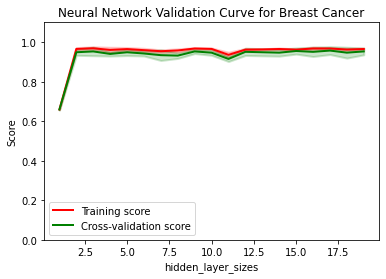

In [997]:
#print (neural_network_gridSearch (breast_cancer_train, breast_cancer_lable_train))
#neural_network_validation_curve("Neural Network Validation Curve for Heart Disease", train_data, train_lable)
neural_network_validation_curve("Neural Network Validation Curve for Breast Cancer", breast_cancer_train, breast_cancer_lable_train)

In [831]:
def neural_network_test(title,train_data, train_lable, test_data, test_lable):
    Acc=[]
    FP=[]
    FN=[]
    
    
    for each in range(1,20):
        clf =MLPClassifier(activation='tanh', alpha=0.1, max_iter=10000, random_state=7, solver="sgd",hidden_layer_sizes=each)
        clf = clf.fit(train_data, train_lable)
        score=clf.score(test_data, test_lable)
        Acc.append(score)
        
    raw_data = {'Accuracy': Acc}

    df1 = pd.DataFrame(raw_data,
                  index=pd.Index(range(1,20), name='Parameters Name'),
                  columns=pd.Index(['Accuracy'], name='Parameters'))
    print(df1)
    plt.plot(df1.index,"Accuracy",label="Accuracy", data=df1, marker='o')
    plt.ylim (0,1)
    plt.legend()
    plt.xlabel("Hidden Layers")
    plt.ylabel("Score")
    plt.title (title)
    plt.show()
    plt.close()

Parameters       Accuracy
Parameters Name          
1                0.529126
2                0.529126
3                0.529126
4                0.529126
5                0.529126
6                0.529126
7                0.805825
8                0.781553
9                0.733010
10               0.747573
11               0.805825
12               0.800971
13               0.776699
14               0.781553
15               0.825243
16               0.805825
17               0.810680
18               0.820388
19               0.800971


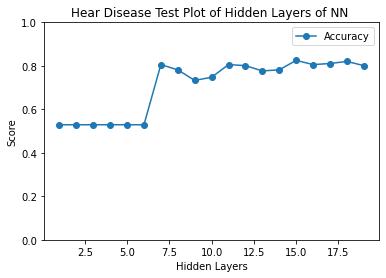

In [832]:
neural_network_test("Hear Disease Test Plot of Hidden Layers of NN ",train_data, train_lable, test_data, test_lable)
#neural_network_test("Breast Cancer Test Plot of Hidden Layers of NN ", breast_cancer_train, breast_cancer_lable_train, breast_cancer_test, breast_cancer_lable_test)

In [648]:
def neural_network_learning_curve(title,X,y):
    fig, axes = plt.subplots(2, 2, figsize=(10, 15))


   # parameter=decision_tree_gridSearch (X,y)
    # Cross validation with 100 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

    estimator  =MLPClassifier(activation='tanh', alpha=0.1, max_iter=10000, random_state=7,hidden_layer_sizes=5, solver="sgd")
    plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)


    plt.show()
    plt.close()

In [649]:
#neural_network_learning_curve("Neural Network Learning Curve for Breast Cancer", breast_cancer_train, breast_cancer_lable_train)

In [650]:
def knn_gridSearch(train_data,train_lable):
    
    parameters = {'n_neighbors':[4,5,6,7], 'leaf_size':[1,3,5], 'algorithm':['auto', 'kd_tree'],'n_jobs':[-1]}
    
    grid = GridSearchCV(KNeighborsClassifier(),parameters,refit=True,verbose=2)
    grid.fit(train_data, train_lable)
    return grid.best_params_

In [651]:
#print (knn_gridSearch (train_data,train_lable))
    

In [652]:
def knn_validation_curve(title,X,y):
    
    parameter=knn_gridSearch (X,y)
    

    estimator =KNeighborsClassifier(algorithm='auto', leaf_size=1, n_jobs=-1)
    validationCurve(estimator, title, X, y, "n_neighbors", range(1,10))

In [653]:
#knn_validation_curve ("knn Validation Curve for Breast Cancer", breast_cancer_train, breast_cancer_lable_train)
#knn_validation_curve ("knn Validation Curve for Heart Disease", train_data, train_lable)

In [654]:
def knn_learning_curve(title,X,y):
    fig, axes = plt.subplots(2, 2, figsize=(10, 15))


    parameter=knn_gridSearch (X,y)
    # Cross validation with 100 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

    estimator =KNeighborsClassifier(algorithm=parameter['algorithm'], leaf_size=parameter['leaf_size'], n_jobs=parameter['n_jobs'],n_neighbors= parameter['n_neighbors']) 
    plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4)


    plt.show()
    plt.close()

In [655]:
#knn_learning_curve ("KNN Learning Curve for Breast Cancer",breast_cancer_train, breast_cancer_lable_train)

In [656]:
def knn_knumber_test_plot(title,train_data, train_lable, test_data, test_lable):
    Acc=[]
    FP=[]
    FN=[]
    
    parameter=knn_gridSearch (train_data, train_lable)
    for each in range(1,10):
        clf =KNeighborsClassifier(leaf_size=parameter["leaf_size"], algorithm=parameter["algorithm"],n_jobs=parameter["n_jobs"], n_neighbors=each)
        clf = clf.fit(train_data, train_lable)
        score=clf.score(test_data, test_lable)
        Acc.append(score)
        
    raw_data = {'Accuracy': Acc}

    df1 = pd.DataFrame(raw_data,
                  index=pd.Index(range(1,10), name='Parameters Name'),
                  columns=pd.Index(['Accuracy'], name='Parameters'))
    print(df1)
    plt.plot(df1.index,"Accuracy",label="Accuracy", data=df1, marker='o')
    plt.ylim (0,1)
    plt.legend()
    plt.xlabel("Number of Neighbors")
    plt.ylabel("Score")
    plt.title (title)
    plt.show()
    plt.close()

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=4; total time=   0.0s
[CV] END algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=4; total time=   0.0s
[CV] END algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=4; total time=   0.0s
[CV] END algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=4; total time=   0.0s
[CV] END algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=4; total time=   0.0s
[CV] END algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=5; total time=   0.0s
[CV] END algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=5; total time=   0.0s
[CV] END algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=5; total time=   0.0s
[CV] END algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=5; total time=   0.0s
[CV] END algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=5; total time=   0.0s
[CV] END algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=6; total time=   0.0s
[CV] END algorithm=auto, 

[CV] END algorithm=kd_tree, leaf_size=5, n_jobs=-1, n_neighbors=4; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=5, n_jobs=-1, n_neighbors=5; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=5, n_jobs=-1, n_neighbors=5; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=5, n_jobs=-1, n_neighbors=5; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=5, n_jobs=-1, n_neighbors=5; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=5, n_jobs=-1, n_neighbors=5; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=5, n_jobs=-1, n_neighbors=6; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=5, n_jobs=-1, n_neighbors=6; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=5, n_jobs=-1, n_neighbors=6; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=5, n_jobs=-1, n_neighbors=6; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=5, n_jobs=-1, n_neighbors=6; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=5, n_jobs=-1, n_

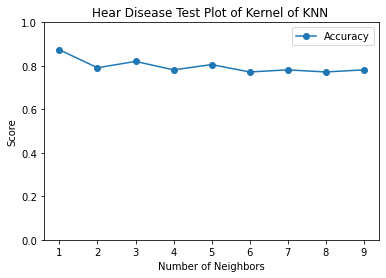

In [657]:
knn_knumber_test_plot("Hear Disease Test Plot of Kernel of KNN ",train_data, train_lable, test_data, test_lable)
#knn_knumber_test_plot("Breast Cancer Test Plot of Kernel of KNN ", breast_cancer_train, breast_cancer_lable_train, breast_cancer_test, breast_cancer_lable_test)

In [345]:
def SVM_gridSearch (train_data,train_lable):
    param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
    
    # define evaluation
    #cv = RepeatedStratifiedKFold(n_splits=60, n_repeats=3, random_state=1)
    # define the search
    grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
    grid.fit(train_data, train_lable)
    
    
    return grid.best_params_

In [346]:
#print (SVM_gridSearch(breast_cancer_train, breast_cancer_lable_train))

In [347]:
def SVM_validation_curve(title,X,y):
    
    parameter=SVM_gridSearch (X,y)
    

    estimator =SVC(C=parameter["C"], gamma=parameter["gamma"])
    validationCurve(estimator, title, X, y, "kernel", ['rbf', 'poly', 'sigmoid'])

In [348]:
#SVM_validation_curve ("SVM Validation Curve for Breast Cancer", breast_cancer_train, breast_cancer_lable_train)

In [349]:
def SVM_learning_curve(title,X,y):
    fig, axes = plt.subplots(2, 2, figsize=(10, 15))


    parameter=SVM_gridSearch (X,y)
    # Cross validation with 100 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

    estimator =SVC(C=parameter["C"], gamma=parameter["gamma"], kernel=parameter["kernel"])
    plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)


    plt.show()
    plt.close()

In [350]:
def SVM_C_plot():
    Acc=[]
    FP=[]
    FN=[]
    for each in [01.,1,10,100]:
        clf =SVC(C=each, gamma=0.001, kernel="rbf")
        clf = clf.fit(train_data, train_lable)
        prediction=clf.predict(test_data)
        Acc.append(accuracy(prediction, test_lable))
        FP.append(false_positive (prediction, test_lable))
        FN.append(false_negative (prediction, test_lable))
    raw_data = {
            'Accuracy': Acc, 'False Positive':FP, 'False Negative': FN 
            
            }

    df1 = pd.DataFrame(raw_data,
                  index=pd.Index(['0.1', '1', '10', '100'], name='Parameters Name'),
                  columns=pd.Index(['Accuracy', 'False Positive', 'False Negative'], name='Parameters'))

    plt.plot(df1.index,"Accuracy",label="Accuracy", data=df1, marker='o')

    plt.plot(df1.index,"False Positive",label="False positive", data=df1, marker='o')
    plt.plot(df1.index,"False Negative", label="False Negative", data=df1, marker='o')
    plt.legend()
    plt.xlabel("C")
    plt.ylabel("Number")
    plt.title ("SVM C Plot")
    plt.show()
    plt.close()

In [351]:
#SVM_learning_curve("SVM Learning Curve for Breast Cancer",breast_cancer_train, breast_cancer_lable_train)
#SVM_learning_curve("SVM Learning Curve for Heart Disease",train_data, train_lable)

In [352]:
#SVM_C_plot()

In [353]:
def SVM_gamma_plot():
    Acc=[]
    FP=[]
    FN=[]
    for each in [1,0.1,0.01,0.001]:
        clf =SVC(C=100, gamma=each, kernel="rbf")
        clf = clf.fit(train_data, train_lable)
        prediction=clf.predict(test_data)
        Acc.append(accuracy(prediction, test_lable))
        FP.append(false_positive (prediction, test_lable))
        FN.append(false_negative (prediction, test_lable))
    raw_data = {
            'Accuracy': Acc, 'False Positive':FP, 'False Negative': FN 
            
            }

    df1 = pd.DataFrame(raw_data,
                  index=pd.Index(['1', '0.1', '0.01', '0.001'], name='Parameters Name'),
                  columns=pd.Index(['Accuracy', 'False Positive', 'False Negative'], name='Parameters'))
    print(df1)
    plt.plot(df1.index,"Accuracy",label="Accuracy", data=df1, marker='o')

    plt.plot(df1.index,"False Positive",label="False positive", data=df1, marker='o')
    plt.plot(df1.index,"False Negative", label="False Negative", data=df1, marker='o')
    plt.legend()
    plt.xlabel("gamma")
    plt.ylabel("Number")
    plt.title ("SVM gamma Plot")
    plt.show()
    plt.close()

In [354]:
#SVM_gamma_plot()

In [355]:
def SVM_kernel_test(title, train_data, train_lable, test_data, test_lable):
    
    Acc=[]
    FP=[]
    FN=[]
    parameter=SVM_gridSearch (train_data, train_lable)
    for each in ['rbf', 'poly', 'sigmoid']:
        clf =SVC(C=parameter["C"], gamma=parameter["gamma"], kernel=each)
        clf = clf.fit(train_data, train_lable)
        score=clf.score(test_data, test_lable)
        Acc.append(score)
        
    raw_data = {'Accuracy': Acc}

    df1 = pd.DataFrame(raw_data,
                  index=pd.Index(['rbf', 'poly', 'sigmoid'], name='Parameters Name'),
                  columns=pd.Index(['Accuracy'], name='Parameters'))
    print(df1)
    plt.plot(df1.index,"Accuracy",label="Accuracy", data=df1, marker='o')
    plt.ylim (0,1)
    plt.legend()
    plt.xlabel("Kernel")
    plt.ylabel("Score")
    plt.title (title)
    plt.show()
    plt.close()
    

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................

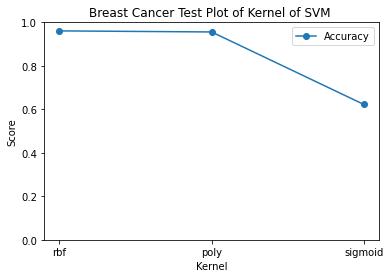

In [356]:
#SVM_kernel_test("Hear Disease Test Plot of Kernel of SVM ",train_data, train_lable, test_data, test_lable)
#SVM_kernel_test("Breast Cancer Test Plot of Kernel of SVM ", breast_cancer_train, breast_cancer_lable_train, breast_cancer_test, breast_cancer_lable_test)

In [ ]:
def gradient_boost_gridSearch (train_data,train_lable):
    
    gbc = GradientBoostingClassifier()
    parameters = { "n_estimators":[5,50,250,500], "max_depth":[1,3,5,7,9],"learning_rate":[0.01,0.1,1,10,100]}
    grid = GridSearchCV(gbc,parameters,refit=True,verbose=2)
    grid.fit(train_data, train_lable)
    
    return grid.best_params_

In [ ]:
#print(gradient_boost_gridSearch (train_data,train_lable))

In [ ]:
def boost_number_test_plot(title,train_data, train_lable, test_data, test_lable):
    Acc=[]
    FP=[]
    FN=[]
    parameter=gradient_boost_gridSearch (train_data, train_lable)
    for each in [5,50,250,500]:
        clf =GradientBoostingClassifier(max_depth=parameter["max_depth"], learning_rate=parameter["learning_rate"],n_estimators=each)
        clf = clf.fit(train_data, train_lable)
        score=clf.score(test_data, test_lable)
        Acc.append(score)
        
    raw_data = {'Accuracy': Acc}

    df1 = pd.DataFrame(raw_data,
                  index=pd.Index([5,50,250,500], name='Parameters Name'),
                  columns=pd.Index(['Accuracy'], name='Parameters'))
    print(df1)
    plt.plot(df1.index,"Accuracy",label="Accuracy", data=df1, marker='o')
    plt.ylim (0,1)
    plt.legend()
    plt.xlabel("Number of Estimators")
    plt.ylabel("Score")
    plt.title (title)
    plt.show()
    plt.close()

In [ ]:
#boost_number_test_plot("Hear Disease Test Plot of Number of Estimators of Gradient Boost Tree ",train_data, train_lable, test_data, test_lable)
#boost_number_test_plot("Breast Cancer Test Plot of Number of Estimators of Gradient Boost Tree ", breast_cancer_train, breast_cancer_lable_train, breast_cancer_test, breast_cancer_lable_test)

In [ ]:
def gradient_validation_curve(title,X,y):
    parameter=gradient_boost_gridSearch (X,y)
    

    estimator =GradientBoostingClassifier(max_depth=parameter["max_depth"], learning_rate=parameter["learning_rate"])
    validationCurve(estimator, title, X, y, "n_estimators", [5,50,250,500])

In [ ]:
#gradient_validation_curve ("Gradient Boost Validation Curve for heart disease", train_data, train_lable)

gradient_validation_curve ("Gradient Boost Validation Curve for Breast Cancer", breast_cancer_train, breast_cancer_lable_train)

In [ ]:
def gradient_learning_curve(title,X,y):
    fig, axes = plt.subplots(2, 2, figsize=(10, 15))


    parameter=gradient_boost_gridSearch (X,y)
    
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

    estimator =GradientBoostingClassifier(learning_rate=parameter["learning_rate"], max_depth=parameter["max_depth"], n_estimators=parameter["n_estimators"])
    plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4)


    plt.show()
    plt.close()

In [ ]:
#gradient_learning_curve ("Gradient Boost Validation Curve for heart disease", train_data, train_lable)

In [ ]:
#gradient_learning_curve("Gradient Boost Learning Curve for Heart Disease",train_data, train_lable)